# 📊 JoSAA 2022 Data Visualization
Exploratory Data Analysis and Visualizations using Pandas, Matplotlib, and Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('2022.csv')

# Convert rank columns to numeric
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

## 1. Admission Count by Gender

C:\Users\asus\AppData\Local\Temp\ipykernel_19380\3194418414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


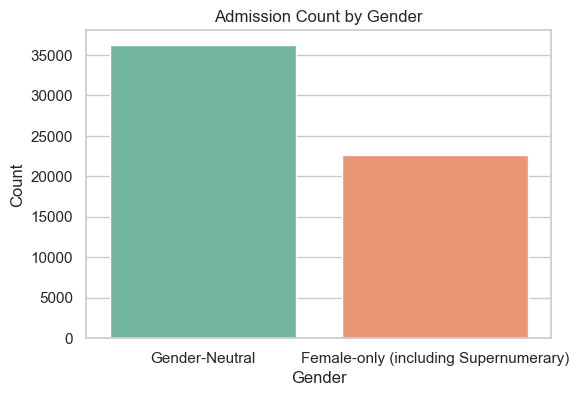

In [2]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Admission Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 2. Closing Rank Distribution by Gender

C:\Users\asus\AppData\Local\Temp\ipykernel_19380\3611098817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Closing Rank', data=df, palette='pastel')


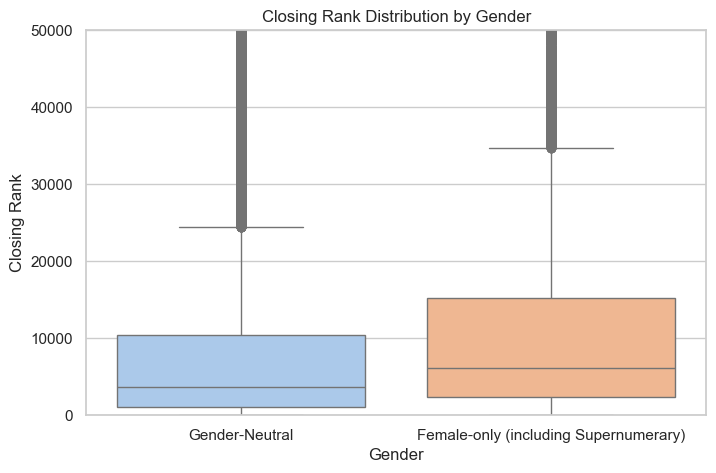

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Closing Rank', data=df, palette='pastel')
plt.title('Closing Rank Distribution by Gender')
plt.ylim(0, 50000)
plt.show()

## 3. Top 10 Institutes by Average Closing Rank

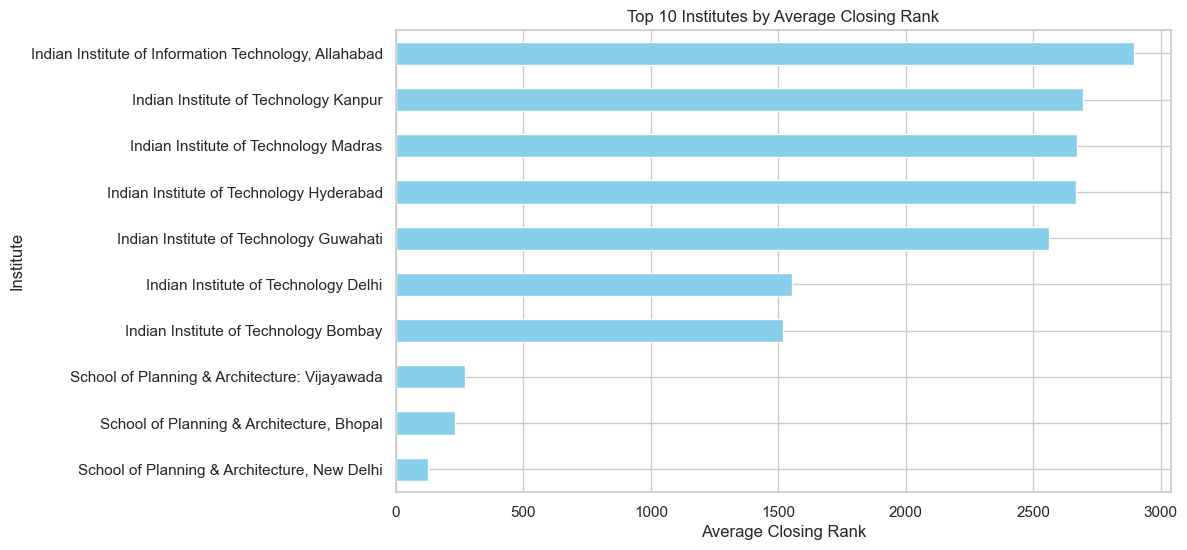

In [4]:
top_institutes = df.groupby('Institute')['Closing Rank'].mean().sort_values().head(10)

plt.figure(figsize=(10, 6))
top_institutes.plot(kind='barh', color='skyblue')
plt.title('Top 10 Institutes by Average Closing Rank')
plt.xlabel('Average Closing Rank')
plt.ylabel('Institute')
plt.show()

## 4. Seat Allocation Count by Round

C:\Users\asus\AppData\Local\Temp\ipykernel_19380\2115951384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Round', data=df, palette='Blues')


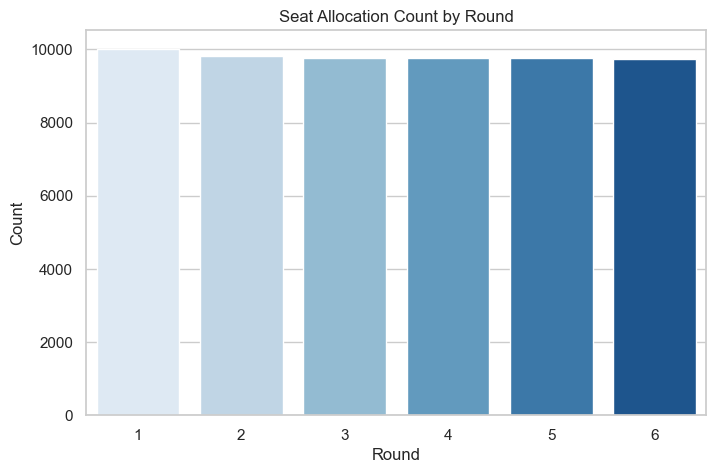

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Round', data=df, palette='Blues')
plt.title('Seat Allocation Count by Round')
plt.xlabel('Round')
plt.ylabel('Count')
plt.show()

## 5. Average Closing Rank by Seat Type

C:\Users\asus\AppData\Local\Temp\ipykernel_19380\2278744350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seat_avg.index, y=seat_avg.values, palette='coolwarm')


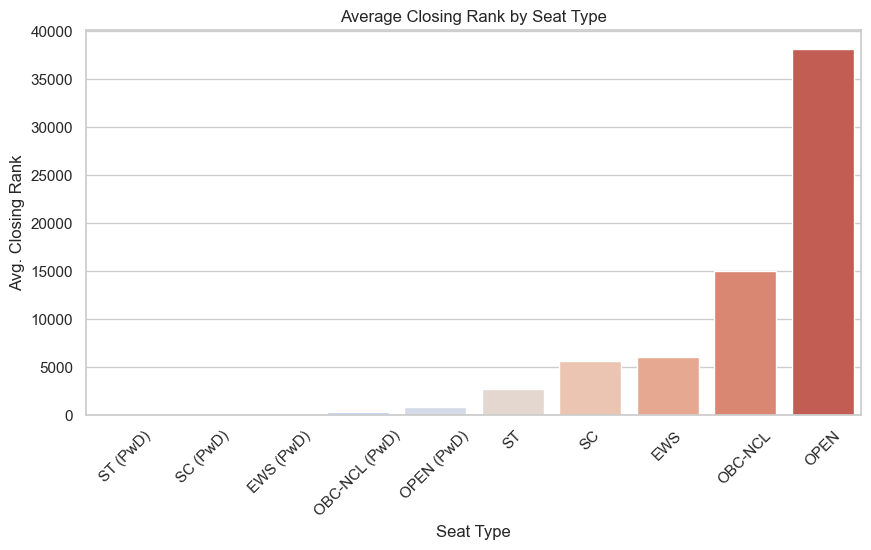

In [6]:
seat_avg = df.groupby('Seat Type')['Closing Rank'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=seat_avg.index, y=seat_avg.values, palette='coolwarm')
plt.title('Average Closing Rank by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Avg. Closing Rank')
plt.xticks(rotation=45)
plt.show()

## 6. Quota-wise Admission Count

C:\Users\asus\AppData\Local\Temp\ipykernel_19380\2541338544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quota', data=df, palette='Spectral')


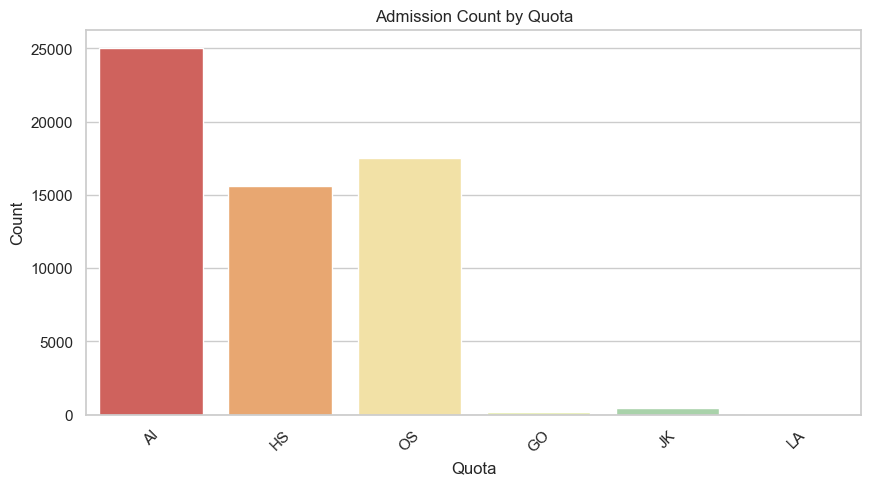

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Quota', data=df, palette='Spectral')
plt.title('Admission Count by Quota')
plt.xlabel('Quota')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 7. Top 10 Programs by Lowest Average Closing Rank

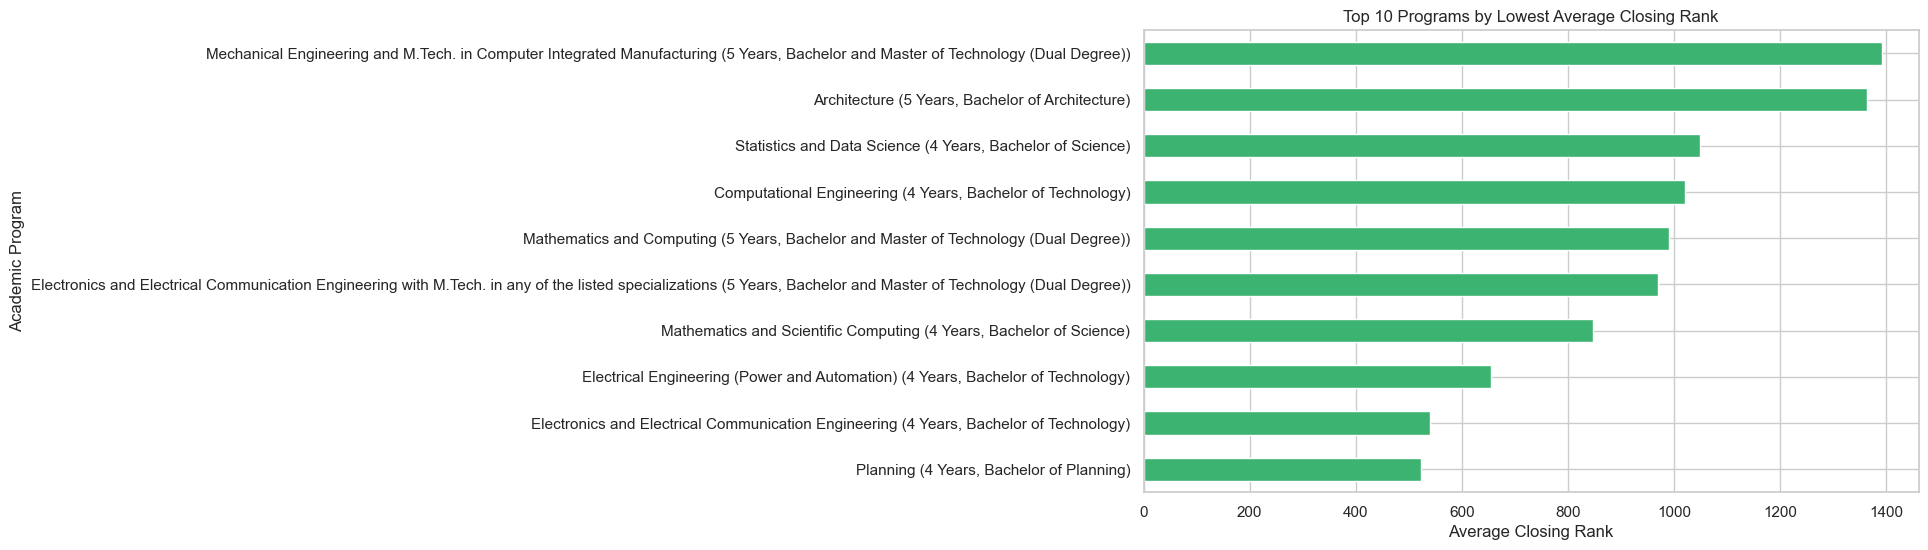

In [8]:
top_programs = df.groupby('Academic Program Name')['Closing Rank'].mean().sort_values().head(10)

plt.figure(figsize=(10, 6))
top_programs.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Programs by Lowest Average Closing Rank')
plt.xlabel('Average Closing Rank')
plt.ylabel('Academic Program')
plt.show()

## 8. Heatmap: Average Closing Rank (Institute vs Program)

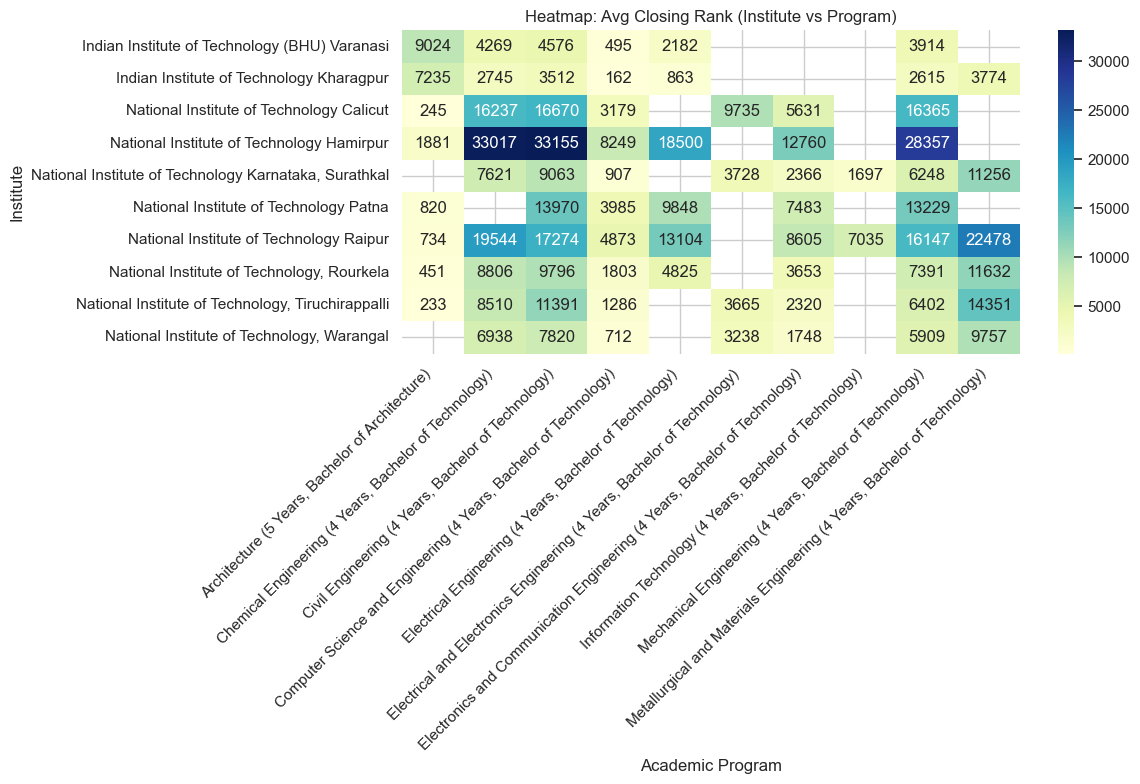

In [9]:
# Filter top institutes and programs
top_insts = df['Institute'].value_counts().head(10).index
top_progs = df['Academic Program Name'].value_counts().head(10).index

heat_df = df[df['Institute'].isin(top_insts) & df['Academic Program Name'].isin(top_progs)]
pivot_table = heat_df.pivot_table(index='Institute', columns='Academic Program Name', values='Closing Rank', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap: Avg Closing Rank (Institute vs Program)')
plt.xlabel('Academic Program')
plt.ylabel('Institute')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()